In [1]:
import pandas as pd
import numpy as np
#preprocessing
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import string
from string import punctuation

In [2]:
#Models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

In [3]:
def generate_word_cloud(comments_pool):
    wordcloud = WordCloud().generate(comments_pool)
    plt.axis("off")
    plt.imshow(wordcloud)
#     plt.show()

In [4]:
if __name__ == "__main__":
    initial_comments_data = pd.read_csv("comments_data.csv")
    comments_data_with_duplicates_values = initial_comments_data.dropna()
    comments_data = comments_data_with_duplicates_values.drop_duplicates()
    print(comments_data.head())

                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1


In [5]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
comments_data['punct_rm_comments'] = comments_data.loc[:,'clean_comment'].apply(
            lambda x: remove_punctuation(x)
        )
comments_data = comments_data.drop(columns = 'clean_comment')
comments_data.head()

/tmp/ipykernel_3664/3519289337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_data['punct_rm_comments'] = comments_data.loc[:,'clean_comment'].apply(


,category,punct_rm_comments
0,1,family mormon have never tried explain them t...
1,1,buddhism has very much lot compatible with chr...
2,-1,seriously don say thing first all they won get...
3,0,what you have learned yours and only yours wha...
4,1,for your own benefit you may want read living ...


In [6]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = text.strip().split(' ')
    return tokens
#applying function to the column
comments_data['comment_tokenied']= comments_data['punct_rm_comments'].apply(
    lambda comment: tokenization(comment)
)

In [7]:
comments_data = comments_data.drop(columns = 'punct_rm_comments')
comments_data.head()

,category,comment_tokenied
0,1,"[family, mormon, have, never, tried, explain, ..."
1,1,"[buddhism, has, very, much, lot, compatible, w..."
2,-1,"[seriously, don, say, thing, first, all, they,..."
3,0,"[what, you, have, learned, yours, and, only, y..."
4,1,"[for, your, own, benefit, you, may, want, read..."


In [8]:
#importing nlp library
import nltk
#Stop words present in the library
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
comments_data['no_stopwords_comments']= comments_data['comment_tokenied'].apply(lambda x:remove_stopwords(x))

In [9]:
comments_data = comments_data.drop(columns = 'comment_tokenied')

In [10]:
comments_data.head()

,category,no_stopwords_comments
0,1,"[family, mormon, never, tried, explain, still,..."
1,1,"[buddhism, much, lot, compatible, christianity..."
2,-1,"[seriously, say, thing, first, get, complex, e..."
3,0,"[learned, want, teach, different, focus, goal,..."
4,1,"[benefit, may, want, read, living, buddha, liv..."


In [11]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [12]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
comments_data['stemmed_comments']=comments_data['no_stopwords_comments'].apply(lambda x: stemming(x))

In [13]:
comments_data.head()

,category,no_stopwords_comments,stemmed_comments
0,1,"[family, mormon, never, tried, explain, still,...","[famili, mormon, never, tri, explain, still, s..."
1,1,"[buddhism, much, lot, compatible, christianity...","[buddhism, much, lot, compat, christian, espec..."
2,-1,"[seriously, say, thing, first, get, complex, e...","[serious, say, thing, first, get, complex, exp..."
3,0,"[learned, want, teach, different, focus, goal,...","[learn, want, teach, differ, focu, goal, wrap,..."
4,1,"[benefit, may, want, read, living, buddha, liv...","[benefit, may, want, read, live, buddha, live,..."


In [14]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
# nltk.download('wordnet')

In [15]:
#defining the function for lemmanization
# def lemmanizer(text):
#     lemm_text = [wordnet_lemmatizer.lemmanize(word) for word in text]
#     return lemm_text
# comments_data['leminized_comments']=comments_data['no_stopwords_comments'].apply(
#     lambda x:lemmanizer(x)
# )

In [16]:
# diff = []

# for _, row in comments_data.iterrows():
#     diff.append(list(set(row[3]) - set(row[1])))

In [17]:
# comments_data['diff'] = diff

In [18]:
# comments_data.head()

In [19]:
# comments_data = comments_data.drop(columns = 'address')

In [20]:
comments_data = comments_data.assign(no_stopwords_cmts_dtr = comments_data["no_stopwords_comments"].apply(lambda x:" ".join(x)))
comments_data = comments_data.assign(stemmed_cmts_str = comments_data['stemmed_comments'].apply(lambda x:" ".join(x)))

Positive Comments


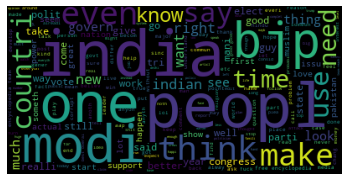

In [21]:
positive_comments_data = comments_data.loc[comments_data.category == 1]
positive_comments = " ".join(positive_comments_data['stemmed_cmts_str'])
positive_comments_word_cloud = generate_word_cloud(positive_comments)
print("Positive Comments")

Nutral Comments


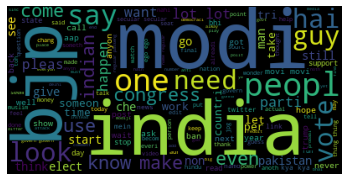

In [22]:
nutral_comments_data = comments_data.loc[comments_data.category == 0]
nutral_comments = " ".join(nutral_comments_data['stemmed_cmts_str'])
nutral_comments_word_cloud = generate_word_cloud(nutral_comments)
print("Nutral Comments")

Negative Comments


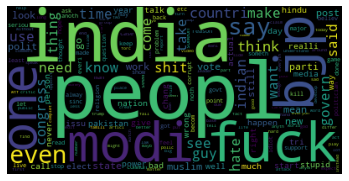

In [23]:
negative_comments_data = comments_data.loc[comments_data.category == -1]
negative_comments = " ".join(negative_comments_data['stemmed_cmts_str'])
negative_comments_word_cloud = generate_word_cloud(negative_comments)
print("Negative Comments")

In [24]:
comments_data.category.unique()

array([ 1, -1,  0])

In [25]:
len(comments_data.index)

36799

In [26]:
comments_data['category'].value_counts()

 1    15771
 0    12778
-1     8250
Name: category, dtype: int64

In [27]:
comments_data.tail()

,category,no_stopwords_comments,stemmed_comments,no_stopwords_cmts_dtr,stemmed_cmts_str
37244,0,[jesus],[jesu],jesus,jesu
37245,1,"[kya, bhai, pure, saal, chutiya, banaya, modi,...","[kya, bhai, pure, saal, chutiya, banaya, modi,...",kya bhai pure saal chutiya banaya modi aur jab...,kya bhai pure saal chutiya banaya modi aur jab...
37246,0,"[downvote, karna, tha, par, upvote, hogaya]","[downvot, karna, tha, par, upvot, hogaya]",downvote karna tha par upvote hogaya,downvot karna tha par upvot hogaya
37247,1,"[haha, nice]","[haha, nice]",haha nice,haha nice
37248,0,"[facebook, working, bjp’, cell]","[facebook, work, bjp’, cell]",facebook working bjp’ cell,facebook work bjp’ cell


In [28]:
stemmed_comments_data = comments_data.loc[:,['stemmed_cmts_str', 'category']]

In [29]:
reduced_comments_data, rest_data = train_test_split(stemmed_comments_data,test_size=0.70, stratify = stemmed_comments_data['category'])

In [30]:
y = reduced_comments_data.category
y

5365     1
33615    1
21346    1
20732   -1
4335     0
        ..
27619    0
4711     0
29185    0
3264     1
9314     1
Name: category, Length: 11039, dtype: int64

### SVM

In [37]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
x = x_train.toarray()
print(x)
clf.fit(x, y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### CountVectorizor | Multinomial Niave Bayes Classifier

In [32]:
count_vectorizer = CountVectorizer()
comments_count_vectorized = count_vectorizer.fit_transform(reduced_comments_data['stemmed_cmts_str'])
real_targets = reduced_comments_data.category
x_train, x_test, y_train, y_test = train_test_split(comments_count_vectorized, real_targets, test_size=0.33, stratify = reduced_comments_data['category'])
multinomial_niave_bayes_clf_cv = MultinomialNB().fit(x_train, y_train)
predicted_targets = multinomial_niave_bayes_clf_cv.predict(x_test)
print('\n Classification Report with Multinomial Niave Bayes: Count Vectorizor \n', classification_report(y_test, predicted_targets))


 Classification Report with Multinomial Niave Bayes: Count Vectorizor 
               precision    recall  f1-score   support

          -1       0.60      0.33      0.43       817
           0       0.84      0.37      0.51      1265
           1       0.54      0.91      0.68      1561

    accuracy                           0.59      3643
   macro avg       0.66      0.54      0.54      3643
weighted avg       0.66      0.59      0.57      3643



In [ ]:
def count_categories(real_targets):
    categories_count = {'positive': 0, 'neutral': 0, 'negative': 0}
    for category in real_targets:
        if category == 1:
            categories_count['positive'] += 1
        elif category == 0:
            categories_count['neutral'] += 1
        elif category == -1:
            categories_count['negative'] += 1
    return categories_count

In [ ]:
real_targets_categoies_count = count_categories(real_targets)

categories = list(real_targets_categoies_count.keys())
count = list(real_targets_categoies_count.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(categories, count, color ='g',
        width = 0.4)
plt.bar(categories/[], count, color ='red',
        width = 0.2, align = 'center')
 
plt.xlabel("Categories")
plt.ylabel("No. of Comments Categorized")
plt.title("Complete target comment's categorie's count representation")
plt.show()

In [ ]:
y_train_categoies_count = count_categories(y_train)

categories = list(y_train_categoies_count.keys())
count = list(y_train_categoies_count.values())
colors = ['yellow', 'orange', 'red']

fig = plt.figure(figsize = (11, 6))
 
# creating the bar plot
plt.bar(categories, count, color = colors, edgecolor ='blue', width = 0.1)
 
plt.xlabel("Categories")
plt.ylabel("No. of Comments Categorized")
plt.title("y train comment's categorie's count representation", fontweight ='bold', fontsize = 15)
plt.show()

In [ ]:
y_test_categoies_count = count_categories(y_test)

categories = list(y_test_categoies_count.keys())
count = list(y_test_categoies_count.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(categories, count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("No. of Comments Categorized")
plt.title("y test comment's categorie's count representation")
plt.show()

### TfidfVectorizor  | Multinomial Niave Bayes Classifier

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
comments_tfidf_vectorized = tfidf_vectorizer.fit_transform(reduced_comments_data['stemmed_cmts_str'])

df = pd.DataFrame(comments_tfidf_vectorized.toarray(), columns = tfidf_vectorizer.get_feature_names())
df.tail()

x_train, x_test, y_train, y_test = train_test_split(comments_tfidf_vectorized,y,test_size=0.33, stratify = reduced_comments_data['category'])
multinomail_niave_bayes_clf = MultinomialNB().fit(x_train,y_train)
predicted = multinomail_niave_bayes_clf.predict(x_test)
print('\n Classification Report with Multinomial Niave Bayes: \n', classification_report(y_test, predicted))

In [ ]:
x_train_comments = []
for _,comment in comments_data_test_feature.iteritems():
    x_train_comments.append(comment)
# x_train_comments

In [ ]:
# vectorizer.vocabulary_

In [ ]:
vocab_vectorizer = vectorizer.vocabulary_
vocab_list = list(vocab_vectorizer.values())
max_value = 0
for vocab_value in vocab_list:
    if vocab_value > max_value:
        max_value = vocab_value
print(max_value)
# print(vocab_vectorizer)
# X.size

# X.size